In [6]:
# Scientific libraries
import numpy as np
import scipy.stats as stats
import scipy.special as sf
import scipy.integrate as integrate
import scipy.interpolate as interpolate


%matplotlib notebook
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1, grid=False)
import seaborn as sns

#optional 3ML imports

from threeML import *
from threeML_utils import *

import warnings
warnings.simplefilter('ignore')
from glob import glob

In [7]:
def read_data(interval=4):
    filename_glob = os.path.join('pha',"*.pha")
    
    files = filter(lambda x: '_bak' not in x, glob(filename_glob))
   
    
    names = [x.split('/')[1].split('.')[0] for x in files]
    
    
    
    plugins = [OGIPLike(x.split('/')[1].split('.')[0], observation=x, spectrum_number=interval, verbose=False) for x in files]
    
    
    for name, pi in zip(names, plugins):
        
        if 'n' in name:
            
            pi.set_active_measurements('8.1-30','35-900')
            
        else:
            
            pi.set_active_measurements('250-30000')

    
    return plugins

In [8]:
band = Band()
band.K.prior = Log_uniform_prior(lower_bound=1E-10,upper_bound=1E2)
band.alpha.set_uninformative_prior(Uniform_prior)
band.beta.set_uninformative_prior(Uniform_prior)
band.xp.prior = Log_uniform_prior(lower_bound=1E1,upper_bound=1E4)

pi = read_data()

model = Model(PointSource('grb',0,0,spectral_shape=band))
bayes = BayesianAnalysis(model, DataList(*pi))

In [10]:
res = bayes.sample(24,500,500, quiet=True)


Mean acceptance fraction: 0.4479166666666667



<IPython.core.display.Javascript object>


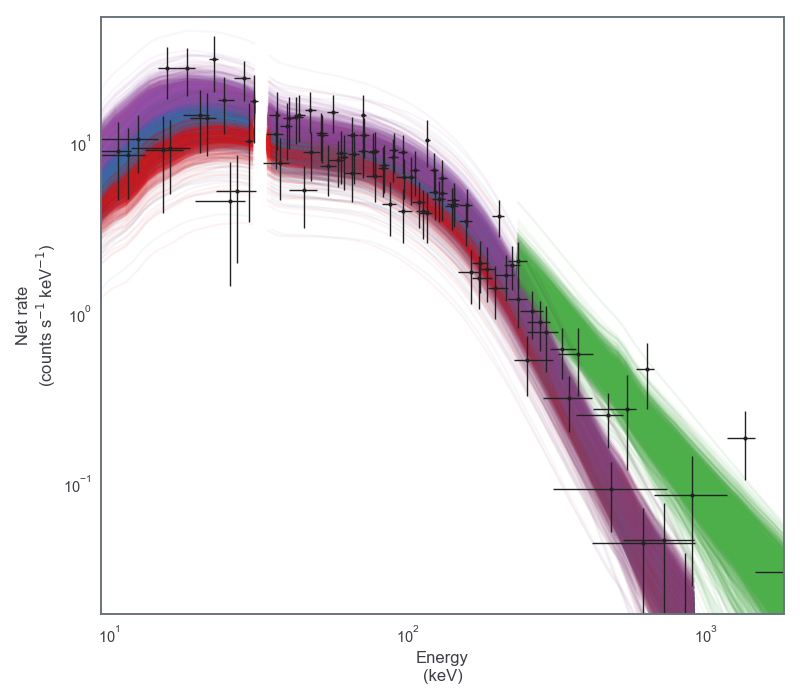

In [11]:
display_posterior_model_counts(bayesian_analysis=bayes,
                               thin=20,
                               min_rate=40,
                               step=False,
                               data_color='k',
                              data_kwargs=dict(fmt='o'),
                              
                              
                              );